2.  Implement a denoising autoencoder that removes noise from images.
    Train using dataset with artificially added noise.
    Compare noisy and reconstructed images.

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 847ms/step - loss: 0.0548 - val_loss: 0.0199
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - loss: 0.0193 - val_loss: 0.0149
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 885ms/step - loss: 0.0138 - val_loss: 0.0116
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - loss: 0.0107 - val_loss: 0.0099
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 949ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 865ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 869ms/step - loss: 0.0083 - val_loss: 0.0080
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 989ms/step - loss: 0.0083 - val_loss: 0.0078
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 896ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 962ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 984ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 947m

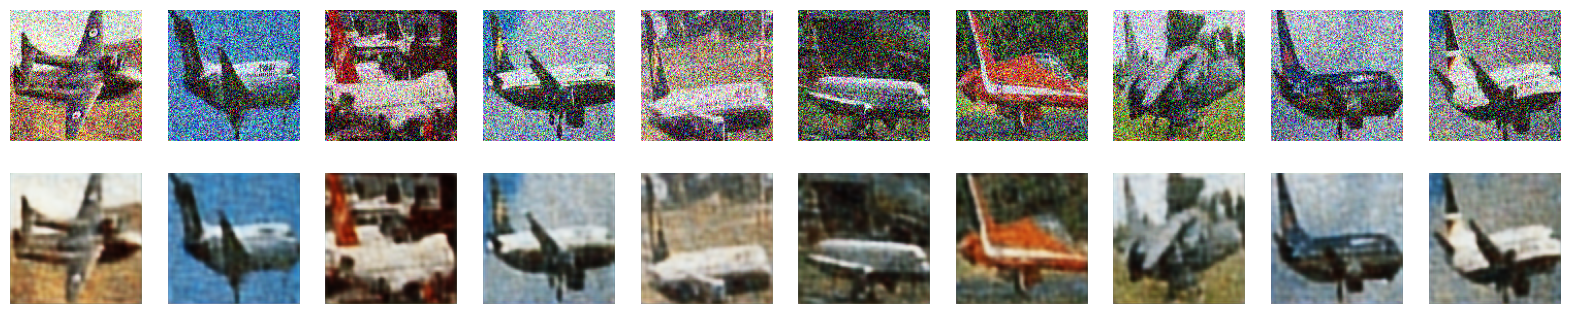

In [67]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

dataset_folder = r"C:\Users\manup\Desktop\5" 
img_size = (128, 128)  

def load_images_from_folder(folder, img_size):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = load_img(img_path, target_size=img_size) 
            img = img_to_array(img) / 255.0
            images.append(img)
        except Exception as e:
            print(f"Error loading {filename}: {e}")
    return np.array(images)

images = load_images_from_folder(dataset_folder, img_size)

x_train, x_test = train_test_split(images, test_size=0.2, random_state=42)

noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

input_img = Input(shape=(img_size[0], img_size[1], 3)) 

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x) 

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=16,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.axis("off")

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.axis("off")

plt.show()
